In [19]:
import cv2
from PIL import Image
import numpy as np

In [16]:
image_pth = "./data/paper_qr/File 001.bmp"
qr_image = cv2.imread(image_pth, 0)

In [66]:
kernel = np.ones((3,3), np.uint8)

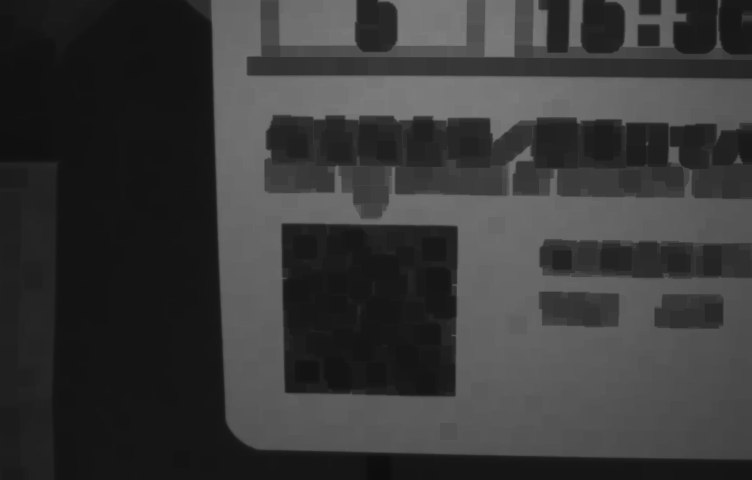

In [95]:
erosion = cv2.erode(qr_image, kernel, iterations = 8)
Image.fromarray(erosion)

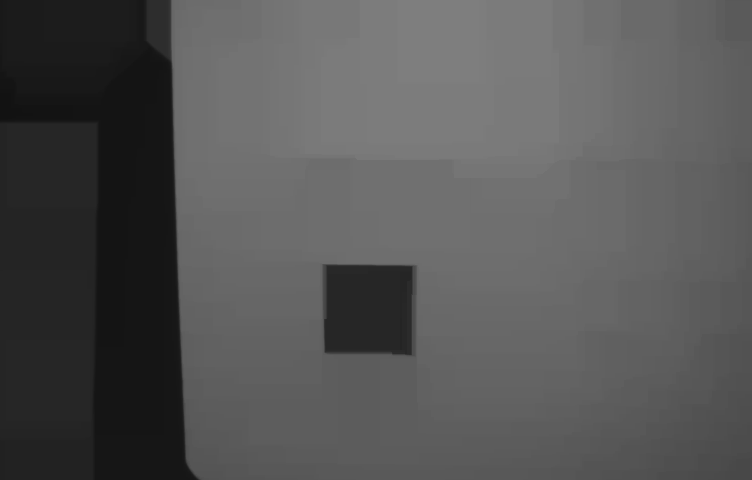

In [99]:
dilation = cv2.dilate(erosion, kernel, iterations = 40)
Image.fromarray(dilation)



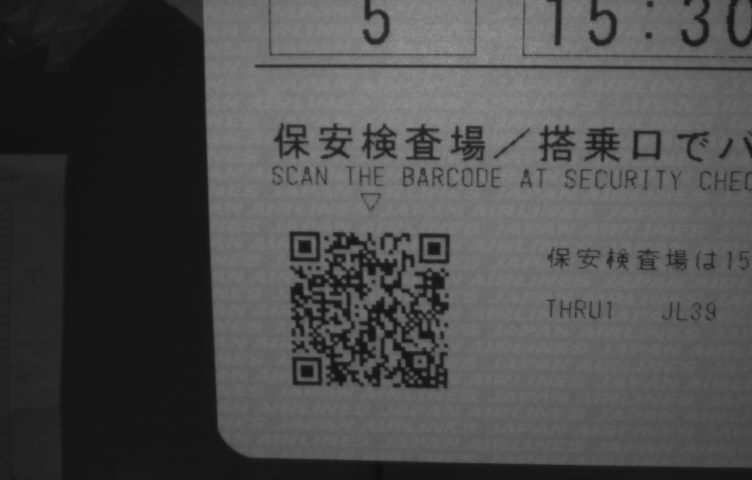

In [98]:
# 原圖
Image.fromarray(qr_image)


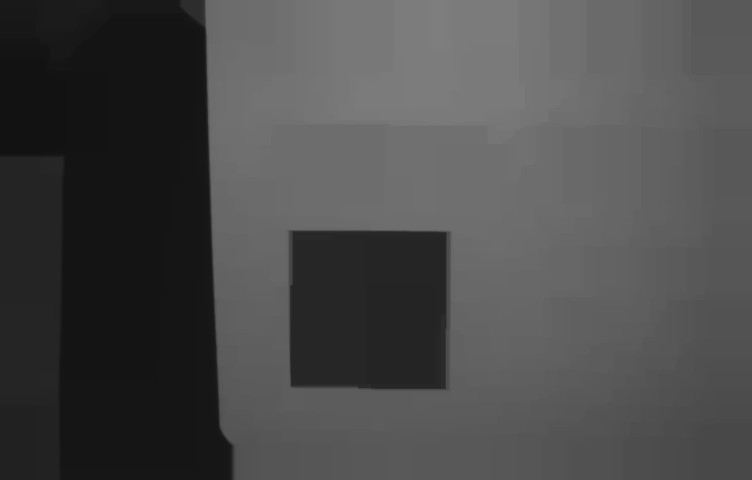

In [102]:
result = cv2.erode(dilation, kernel, iterations = 40-8+2)
Image.fromarray(result)